# Hand Written Digit Prediction 

## import Library

In [29]:
import pandas as pd

In [30]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

## import Data

In [32]:
from sklearn.datasets import load_digits

In [33]:
df=load_digits()

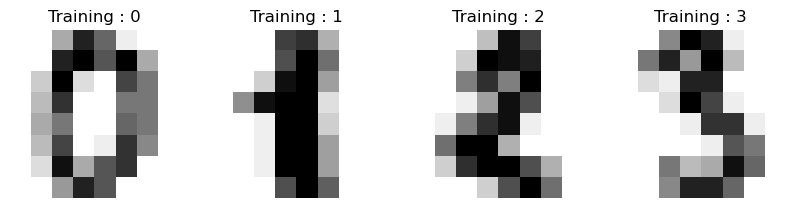

In [34]:
 _,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r , interpolation ="nearest")
        ax.set_title("Training : %i" % label)

## Data Preprocessing

In [35]:
df.images.shape

(1797, 8, 8)

In [36]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [37]:
df.images[0].shape

(8, 8)

In [38]:
len(df.images)

1797

In [39]:
n_samples=len(df.images)
data=df.images.reshape(n_samples,-1)


In [40]:
data[0].shape

(64,)

In [41]:
data.shape

(1797, 64)

## Scaling Image  Data

In [42]:
data.min()

0.0

In [43]:
data.max()

16.0

In [44]:
data=data/16

In [45]:
data.min()

0.0

In [46]:
data.max()

1.0

In [47]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test =train_test_split(data,df.target,test_size=0.3)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier()

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier()

##  Predict Test Data

 y_pred = rf.predict(X_test)

In [55]:
y_pred = rf.predict(X_test)

##  Model Accuracy

In [56]:
from sklearn.metrics import confusion_matrix ,classification_report

In [57]:
confusion_matrix(y_test, y_pred)

array([[50,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 52,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 47,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 54,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 59]], dtype=int64)

In [58]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.95      1.00      0.97        54
           2       1.00      1.00      1.00        45
           3       0.96      0.96      0.96        54
           4       0.96      1.00      0.98        46
           5       0.96      0.94      0.95        50
           6       0.98      0.98      0.98        62
           7       1.00      1.00      1.00        57
           8       0.93      0.93      0.93        58
           9       0.98      0.94      0.96        63

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

